In [1]:
# Import Pandas Repository
import pandas as pd

# Read the dataset using read_excel function from Pandas
churn_dataset = pd.read_excel('turknetchurnekimanonim.xlsx')

# Show first a few rows of the data
churn_dataset.head(5)


,Unnamed: 0,ILTELKODU,ILADI,POSILCE,ILCE,CINSIYET,DURUM,ABONEBAS,CLOSE_DATE,KALDIGI_AY_SAYISI,...,DENVERGIRISTARIHI_3,DENVERCIKISTARIHI_3,DENVERKALDIGISURE_GUN_3,IKNATICKET_3,PORTERROR_SAYISI_3,MAX_SESSIONTIME_3,MIN_SESSIONTIME_3,TOTALUPLOADGB_3,TOTALDOWNLOADGB_3,CHURNTEST_DATE
0,0,212.0,İstanbul (Avrupa),939.0,SULTANGAZİ,E,A,2016-04-20,NaT,54,...,NaN,NaN,0,0,10,87108,0,16.5013,272.1967,2020-10-31
1,1,212.0,İstanbul (Avrupa),420.0,SARIYER,K,A,2016-04-20,NaT,54,...,NaN,NaN,0,0,1,90271,0,135.8656,185.5825,2020-10-31
2,2,262.0,Kocaeli,998.0,İZMİT,E,A,2016-04-21,NaT,54,...,NaN,NaN,0,0,3,90112,0,1.8255,46.6458,2020-10-31
3,3,212.0,İstanbul (Avrupa),418.0,KÜÇÜKÇEKMECE,E,A,2016-04-21,NaT,54,...,NaN,NaN,0,0,15,87588,1664,2.0288,42.0181,2020-10-31
4,4,212.0,İstanbul (Avrupa),425.0,BAYRAMPAŞA,E,A,2016-04-21,2020-10-02,54,...,NaN,NaN,0,0,0,0,0,0.0000,0.0000,2020-10-31


A    180341
K     11953
Name: DURUM, dtype: int64


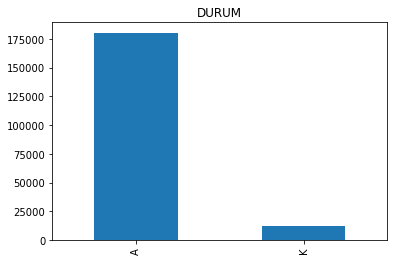

In [2]:
# check the DURUM column of data
print(churn_dataset.DURUM.value_counts())

# plot the values of DURUM
churn_dataset.DURUM.value_counts().plot(kind='bar', title='DURUM');

Before under sampling
0: 180341  1: 11953
After random under-sampling:
1    11953
0    11953
Name: DURUM, dtype: int64


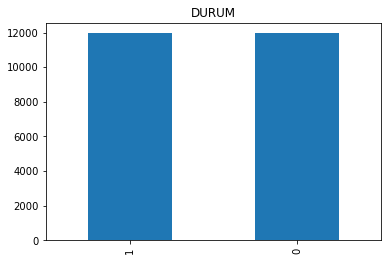

In [3]:
# Import label encoding function to digitize categorical values.
from sklearn.preprocessing import LabelEncoder

# apply label encoding for 'DURUM' column
labelEncoder = LabelEncoder()
churn_dataset['DURUM'] = labelEncoder.fit_transform(churn_dataset['DURUM'])

# undersampling to equalize 'DURUM' classes
DURUM_0, DURUM_1 = churn_dataset.DURUM.value_counts()
print("Before under sampling\n0:",DURUM_0," 1:",DURUM_1)

# Divide the data by class by 'DURUM' feature 
data_DURUM_0 = churn_dataset[churn_dataset['DURUM'] == 0]
data_DURUM_1 = churn_dataset[churn_dataset['DURUM'] == 1]


# undersampling for large data_DURUM_0 with length of data_DURUM_1
data_DURUM_0_undersampled = data_DURUM_0.sample(DURUM_1)

#combine the data_DURUM_0_undersampled and data_DURUM_1 as data
churn_dataset = pd.concat([data_DURUM_0_undersampled, data_DURUM_1], axis=0)

# clean the temporary objects
del data_DURUM_0
del data_DURUM_1
del data_DURUM_0_undersampled

# shuffle the rows of data
churn_dataset.sample(frac=1)

# check the data after undersampling
print('After random under-sampling:')
print(churn_dataset.DURUM.value_counts())

churn_dataset.DURUM.value_counts().plot(kind='bar', title='DURUM');

In [4]:
# Removing the columns which has only one unique value.

for col_name in churn_dataset.columns:
    if len(churn_dataset[col_name].unique()) == 1:
        churn_dataset = churn_dataset.drop(col_name,1)
        print("Freature '{col_name}' is removed from data because it has only one unique value".format(col_name=col_name))
churn_dataset.head()    

Freature 'HIZMETKANALI_SIKAYETSAYISI_1' is removed from data because it has only one unique value
Freature 'FATURAINCELEME_DESTEKSAYISI_1' is removed from data because it has only one unique value
Freature 'HIZMETKANALI_TICKETKAPANMASURESI_1' is removed from data because it has only one unique value
Freature 'HIZMETKANALI_TICKETSL_1' is removed from data because it has only one unique value
Freature 'FATURAINCELEME_DESTEKKAPANMASURESI_1' is removed from data because it has only one unique value
Freature 'FATURAINCELEME_TICKETSL_1' is removed from data because it has only one unique value
Freature 'OIMSIKAYET_DESTEKKAPANMASURESI_1' is removed from data because it has only one unique value
Freature 'OIMSIKAYET_TICKETSL_1' is removed from data because it has only one unique value
Freature 'BTK_SIKAYET_1' is removed from data because it has only one unique value
Freature 'DENVERGIRISTARIHI_1' is removed from data because it has only one unique value
Freature 'DENVERCIKISTARIHI_1' is remove

,Unnamed: 0,ILTELKODU,ILADI,POSILCE,ILCE,CINSIYET,DURUM,ABONEBAS,CLOSE_DATE,KALDIGI_AY_SAYISI,...,ADSLARIZA_TICKETKAPANMASURESI_3,ADSLARIZA_TICKETSL_3,INTERNETEBAGLANAMIYORUM_TICKETKAPANMASURESI_3,INTERNETEBAGLANAMIYORUM_TICKETSL_3,IKNATICKET_3,PORTERROR_SAYISI_3,MAX_SESSIONTIME_3,MIN_SESSIONTIME_3,TOTALUPLOADGB_3,TOTALDOWNLOADGB_3
116802,116802,216.0,İstanbul (Anadolu),419.0,PENDİK,K,0,2019-12-14,NaT,10,...,0,0,0,0,0,14,86617,686,26.2783,249.3766
179351,179351,216.0,İstanbul (Anadolu),423.0,ÜSKÜDAR,K,0,2020-04-16,NaT,6,...,475,0,0,0,0,3,89729,0,9.3546,147.2102
173025,173025,224.0,Bursa,197.0,GEMLİK,K,0,2020-07-18,2020-10-25 04:01:06.730,3,...,0,0,0,0,0,1,48486,3622,0.0640,1.2740
30893,30893,322.0,Adana,3.0,YÜREĞİR,E,0,2018-07-13,NaT,27,...,0,0,0,0,0,14,89966,0,144.7296,366.5912
183625,183625,242.0,Antalya,84.0,ALANYA,E,0,2020-05-13,NaT,5,...,0,0,0,0,0,4,86670,0,0.9282,15.6004


In [5]:
# decide which categorical variables you want to use in model
for col_name in churn_dataset.columns:
    type_name = churn_dataset[col_name].dtypes
    unique_cat = len(churn_dataset[col_name].unique())
    print("Feature '{col_name}'('{type_name}') has {unique_cat} unique categories".format(col_name=col_name, unique_cat=unique_cat,type_name=type_name))

Feature 'Unnamed: 0'('int64') has 23906 unique categories
Feature 'ILTELKODU'('float64') has 83 unique categories
Feature 'ILADI'('object') has 83 unique categories
Feature 'POSILCE'('float64') has 1225 unique categories
Feature 'ILCE'('object') has 631 unique categories
Feature 'CINSIYET'('object') has 2 unique categories
Feature 'DURUM'('int64') has 2 unique categories
Feature 'ABONEBAS'('datetime64[ns]') has 1486 unique categories
Feature 'CLOSE_DATE'('datetime64[ns]') has 106 unique categories
Feature 'KALDIGI_AY_SAYISI'('int64') has 52 unique categories
Feature 'ODEMESEKLI'('object') has 2 unique categories
Feature 'ACIKLAMA'('object') has 16 unique categories
Feature 'FATURAGONDERIMTIPI'('object') has 3 unique categories
Feature 'RISKLIMUSTERI'('int64') has 2 unique categories
Feature 'YAPA_VAE'('object') has 2 unique categories
Feature 'KAPASITE'('int64') has 6 unique categories
Feature 'currentDown'('float64') has 5828 unique categories
Feature 'ARKADASINIGETIR'('float64') has 

In [6]:
# there are hundreds of different 'ILCE' values, it is meaningless to use this column.
# remove the unnecessary columns.
churn_dataset = churn_dataset.drop('ILCE',1)
churn_dataset = churn_dataset.drop('POSILCE',1)
churn_dataset = churn_dataset.drop('ILTELKODU',1)
churn_dataset = churn_dataset.drop('ILADI',1)
churn_dataset = churn_dataset.drop('ABONEBAS',1)
churn_dataset = churn_dataset.drop('CLOSE_DATE',1)
churn_dataset = churn_dataset.drop('Unnamed: 0',1)

churn_dataset

,CINSIYET,DURUM,KALDIGI_AY_SAYISI,ODEMESEKLI,ACIKLAMA,FATURAGONDERIMTIPI,RISKLIMUSTERI,YAPA_VAE,KAPASITE,currentDown,...,ADSLARIZA_TICKETKAPANMASURESI_3,ADSLARIZA_TICKETSL_3,INTERNETEBAGLANAMIYORUM_TICKETKAPANMASURESI_3,INTERNETEBAGLANAMIYORUM_TICKETSL_3,IKNATICKET_3,PORTERROR_SAYISI_3,MAX_SESSIONTIME_3,MIN_SESSIONTIME_3,TOTALUPLOADGB_3,TOTALDOWNLOADGB_3
116802,K,0,10,B,(Bireysel)(Yalın) 35 Mbps'e kadar,E-ARŞİV,0,VAE,35840,35839.0,...,0,0,0,0,0,14,86617,686,26.2783,249.3766
179351,K,0,6,B,(Bireysel)(Tam İletişim) 35 Mbps'e Kadar,E-ARŞİV,0,VAE,35840,35840.0,...,475,0,0,0,0,3,89729,0,9.3546,147.2102
173025,K,0,3,B,(Bireysel)(Yalın) 35 Mbps'e kadar,E-ARŞİV,0,VAE,35840,35839.0,...,0,0,0,0,0,1,48486,3622,0.0640,1.2740
30893,E,0,27,B,(Bireysel)(Tam İletişim) 50 Mbps'e Kadar,E-ARŞİV,0,VAE,51200,51197.0,...,0,0,0,0,0,14,89966,0,144.7296,366.5912
183625,E,0,5,B,(Bireysel)(Tam İletişim) 35 Mbps'e Kadar,E-ARŞİV,0,VAE,35840,35840.0,...,0,0,0,0,0,4,86670,0,0.9282,15.6004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192234,E,1,3,B,(Bireysel)(Yalın) 35 Mbps'e kadar,E-ARŞİV,0,VAE,35840,8967.0,...,0,0,0,0,0,2,94114,0,6.4082,113.3355
192248,E,1,3,B,(Bireysel)(Yalın) 16 Mbps'e kadar,E-ARŞİV,0,VAE,16384,0.0,...,4262,0,0,0,0,0,0,0,0.0000,0.0000
192270,E,1,3,B,(Bireysel)(Tam İletişim)(Yapa) 100 Mbps'e Kadar,E-ARŞİV,0,YAPA,102400,NaN,...,64468,1,0,0,0,4,3756,300,0.0578,0.3266
192282,E,1,3,K,(Bireysel)(Yalın) 35 Mbps'e kadar,E-ARŞİV,0,VAE,35840,35840.0,...,0,0,0,0,0,0,86462,0,2.0478,22.9172


In [7]:
# check the 'ACIKLAMA' column's values. We can convert this feature to integer values depending on bandwidth.
churn_dataset['ACIKLAMA'].value_counts().sort_values(ascending=False).head(30)

(Bireysel)(Tam İletişim) 35 Mbps'e Kadar           11601
(Bireysel)(Tam İletişim) 16 Mbpse Kadar             3813
(Bireysel)(Tam İletişim)(Yapa) 100 Mbps'e Kadar     3254
(Bireysel)(Yalın) 35 Mbps'e kadar                   1747
(Bireysel)(Tam İletişim) 75 Mbps'e Kadar            1157
(Bireysel)(Tam İletişim) 100 Mbps'e Kadar            926
(Bireysel)(Yalın) 16 Mbps'e kadar                    517
(Bireysel)(Tam İletişim) 50 Mbps'e Kadar             454
(Bireysel)(Yalın)(Yapa) 100 Mbps'e kadar             138
(Bireysel)(Yalın) 75 Mbps'e kadar                    118
(Bireysel)(Yalın) 100 Mbps'e kadar                   117
(Bireysel)(TN Fiber) 100 Mbps                         35
(Bireysel)(Yalın) 50 Mbps'e kadar                     26
(Bireysel)(TT Fiber) 100 Mbps                          1
(Bireysel)(TN Fiber) 1000 Mbps                         1
(Bireysel)(Yalın)(TT Fiber) 100 Mbps                   1
Name: ACIKLAMA, dtype: int64

In [8]:
# replacing the string values with integer values.

churn_dataset['ACIKLAMA'] = churn_dataset['ACIKLAMA'].replace(["(Bireysel)(Tam İletişim) 16 Mbpse Kadar",
                                                              "(Bireysel)(Yalın) 16 Mbps'e kadar"],16)
churn_dataset['ACIKLAMA'] = churn_dataset['ACIKLAMA'].replace(["(Bireysel)(Tam İletişim) 35 Mbps'e Kadar",
                                                              "(Bireysel)(Yalın) 35 Mbps'e kadar"],35)
churn_dataset['ACIKLAMA'] = churn_dataset['ACIKLAMA'].replace(["(Bireysel)(Tam İletişim) 75 Mbps'e Kadar",
                                                              "(Bireysel)(Yalın) 75 Mbps'e kadar"],75)
churn_dataset['ACIKLAMA'] = churn_dataset['ACIKLAMA'].replace(["(Bireysel)(Tam İletişim)(Yapa) 100 Mbps'e Kadar",
                                                              "(Bireysel)(Tam İletişim) 100 Mbps'e Kadar",
                                                              "(Bireysel)(TN Fiber) 100 Mbps",
                                                              "(Bireysel)(Yalın) 100 Mbps'e kadar",
                                                              "(Bireysel)(Yalın)(Yapa) 100 Mbps'e kadar",
                                                              "(Bireysel)(TT Fiber) 100 Mbps",
                                                              "(Bireysel)(Yalın)(TT Fiber) 100 Mbps"],100)
churn_dataset['ACIKLAMA'] = churn_dataset['ACIKLAMA'].replace(["(Bireysel)(Tam İletişim) 50 Mbps'e Kadar",
                                                              "(Bireysel)(Yalın) 50 Mbps'e kadar",],50)
churn_dataset['ACIKLAMA'] = churn_dataset['ACIKLAMA'].replace(["(Bireysel)(TN Fiber) 200 Mbps"],200)
churn_dataset['ACIKLAMA'] = churn_dataset['ACIKLAMA'].replace(["(Bireysel)(TN Fiber) 1000 Mbps"],1000)

In [9]:
# check the 'ACIKLAMA' column again.
churn_dataset['ACIKLAMA'].value_counts().sort_values(ascending=False).head(12)

35      13348
100      4472
16       4330
75       1275
50        480
1000        1
Name: ACIKLAMA, dtype: int64

In [11]:
# applying label encoding on the non-integer features.

churn_dataset['CINSIYET'] = labelEncoder.fit_transform(churn_dataset['CINSIYET'])
churn_dataset['ODEMESEKLI'] = labelEncoder.fit_transform(churn_dataset['ODEMESEKLI'])
churn_dataset['FATURAGONDERIMTIPI'] = labelEncoder.fit_transform(churn_dataset['FATURAGONDERIMTIPI'])
churn_dataset['RISKLIMUSTERI'] = labelEncoder.fit_transform(churn_dataset['RISKLIMUSTERI'])
churn_dataset['YAPA_VAE'] = labelEncoder.fit_transform(churn_dataset['YAPA_VAE'])
churn_dataset

,CINSIYET,DURUM,KALDIGI_AY_SAYISI,ODEMESEKLI,ACIKLAMA,FATURAGONDERIMTIPI,RISKLIMUSTERI,YAPA_VAE,KAPASITE,currentDown,...,ADSLARIZA_TICKETKAPANMASURESI_3,ADSLARIZA_TICKETSL_3,INTERNETEBAGLANAMIYORUM_TICKETKAPANMASURESI_3,INTERNETEBAGLANAMIYORUM_TICKETSL_3,IKNATICKET_3,PORTERROR_SAYISI_3,MAX_SESSIONTIME_3,MIN_SESSIONTIME_3,TOTALUPLOADGB_3,TOTALDOWNLOADGB_3
116802,1,0,10,0,35,0,0,0,35840,35839.0,...,0,0,0,0,0,14,86617,686,26.2783,249.3766
179351,1,0,6,0,35,0,0,0,35840,35840.0,...,475,0,0,0,0,3,89729,0,9.3546,147.2102
173025,1,0,3,0,35,0,0,0,35840,35839.0,...,0,0,0,0,0,1,48486,3622,0.0640,1.2740
30893,0,0,27,0,50,0,0,0,51200,51197.0,...,0,0,0,0,0,14,89966,0,144.7296,366.5912
183625,0,0,5,0,35,0,0,0,35840,35840.0,...,0,0,0,0,0,4,86670,0,0.9282,15.6004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192234,0,1,3,0,35,0,0,0,35840,8967.0,...,0,0,0,0,0,2,94114,0,6.4082,113.3355
192248,0,1,3,0,16,0,0,0,16384,0.0,...,4262,0,0,0,0,0,0,0,0.0000,0.0000
192270,0,1,3,0,100,0,0,1,102400,NaN,...,64468,1,0,0,0,4,3756,300,0.0578,0.3266
192282,0,1,3,1,35,0,0,0,35840,35840.0,...,0,0,0,0,0,0,86462,0,2.0478,22.9172


In [14]:
# check the missing data
churn_dataset.isnull().sum().sort_values(ascending=False).head()

TOTALDOWNLOADGB_3            0
TDU_DESTEKSAYISI_2           0
CM_TICKETKAPANMASURESI_1     0
CM_TICKETSL_1                0
TDU_TICKETKAPANMASURESI_1    0
dtype: int64

In [13]:
# fill the NaN values of 'currntDown' column with its mean value.
churn_dataset['currentDown'].fillna((churn_dataset['currentDown'].mean()), inplace=True)

# fill the NaN values of 'ARKADASINIGETIR' column with 0s.
churn_dataset['ARKADASINIGETIR'].fillna(0, inplace=True)


In [16]:
# check the missing data again
churn_dataset.isnull().sum().sort_values(ascending=False).head()

TOTALDOWNLOADGB_3            0
TDU_DESTEKSAYISI_2           0
CM_TICKETKAPANMASURESI_1     0
CM_TICKETSL_1                0
TDU_TICKETKAPANMASURESI_1    0
dtype: int64

In [17]:
# making feature selection from data.
# chooses most correlated features in respect to 'DURUM' column.

import statsmodels.api as sm

train_columns = list(set(list(churn_dataset)) - set(['DURUM']))
looked_columns = list(set(['DURUM']))
# Adding constant column of ones, mandatory for sm.OLS model

# divide the data as input(feature) part and output(target) part.
X = churn_dataset[train_columns].T.drop_duplicates().T
y = churn_dataset[looked_columns]

cols = list(X.columns)
pmax = 1

while(len(cols)>0):
    p=[]
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y.astype(float),X_1.astype(float)).fit()
    p = pd.Series(model.pvalues[1:],index = cols)
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.5):
        cols.remove(feature_with_p_max)
    else:
        break

# selected features by the algorithm.
selected_features = cols
print(selected_features)
len(selected_features)


['PORTERROR_SAYISI_3', 'DESTEKSAYISI_3', 'CM_DESTEKSAYISI_1', 'IKNATICKET_3', 'INTERNETEBAGLANAMIYORUM_DESTEKSAYISI_3', 'TOTALDOWNLOADGB_2', 'TDU_DESTEKSAYISI_2', 'FATURA_GECIKME_UCRETI_2', 'YAPA_VAE', 'INTERNETEBAGLANAMIYORUM_TICKETKAPANMASURESI_3', 'INTERNETEBAGLANAMIYORUM_TICKETKAPANMASURESI_1', 'PORTERROR_SAYISI_1', 'DESTEKSAYISI_1', 'TDU_DESTEKSAYISI_3', 'currentDown', 'ACIKLAMA', 'CM_TICKETSL_1', 'MAX_SESSIONTIME_1', 'PORTERROR_SAYISI_2', 'CAGRIMERKEZIARAMASAYISI_1', 'TDU_DESTEKSAYISI_1', 'MIN_SESSIONTIME_3', 'OIMSIKAYET_DESTEKSAYISI_1', 'ADSLARIZA_TICKETSL_1', 'IKNATICKET_2', 'TDU_TICKETKAPANMASURESI_1', 'CAGRIMERKEZIARAMASAYISI_3', 'INTERNETEBAGLANAMIYORUM_TICKETSL_1', 'CINSIYET', 'MIN_SESSIONTIME_1', 'TDU_TICKETSL_1', 'KAPASITE', 'CAGRIMERKEZIARAMASAYISI_2', 'INTERNETEBAGLANAMIYORUM_TICKETKAPANMASURESI_2', 'CM_TICKETKAPANMASURESI_1', 'ADSLARIZA_TICKETKAPANMASURESI_3', 'ADSLARIZA_DESTEKSAYISI_3', 'FATURA_GECIKME_2', 'FATURA_GECIKME_UCRETI_3', 'FATURAGONDERIMTIPI', 'FATURA_GECIK

57

In [18]:
X = X[selected_features]
X

,PORTERROR_SAYISI_3,DESTEKSAYISI_3,CM_DESTEKSAYISI_1,IKNATICKET_3,INTERNETEBAGLANAMIYORUM_DESTEKSAYISI_3,TOTALDOWNLOADGB_2,TDU_DESTEKSAYISI_2,FATURA_GECIKME_UCRETI_2,YAPA_VAE,INTERNETEBAGLANAMIYORUM_TICKETKAPANMASURESI_3,...,KALDIGI_AY_SAYISI,CM_DESTEKSAYISI_3,DESTEKSAYISI_2,FATURA_GECIKME_3,FATURA_GECIKME_1,TDU_TICKETKAPANMASURESI_2,TOTALDOWNLOADGB_1,TOTALDOWNLOADGB_3,ARKADASINIGETIRILEGELENLER,CM_DESTEKSAYISI_2
116802,14.0,0.0,0.0,0.0,0.0,261.8267,0.0,0.56,0.0,0.0,...,10.0,0.0,0.0,2.0,2.0,0.0,297.8340,249.3766,1.0,0.0
179351,3.0,4.0,0.0,0.0,0.0,196.3663,0.0,0.00,0.0,0.0,...,6.0,1.0,0.0,0.0,0.0,0.0,176.4554,147.2102,1.0,0.0
173025,1.0,7.0,0.0,0.0,0.0,513.6717,0.0,0.00,0.0,0.0,...,3.0,0.0,0.0,0.0,1.0,0.0,8.6680,1.2740,0.0,0.0
30893,14.0,0.0,0.0,0.0,0.0,469.3159,0.0,0.00,0.0,0.0,...,27.0,0.0,0.0,0.0,0.0,0.0,465.4104,366.5912,0.0,0.0
183625,4.0,0.0,0.0,0.0,0.0,4.7826,0.0,0.00,0.0,0.0,...,5.0,0.0,0.0,1.0,0.0,0.0,22.9987,15.6004,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192234,2.0,14.0,0.0,0.0,0.0,211.0582,0.0,0.00,0.0,0.0,...,3.0,2.0,0.0,0.0,0.0,0.0,241.6930,113.3355,0.0,0.0
192248,0.0,32.0,0.0,0.0,0.0,53.7990,8.0,0.00,0.0,0.0,...,3.0,0.0,24.0,0.0,0.0,15803.0,0.0000,0.0000,1.0,0.0
192270,4.0,18.0,0.0,0.0,0.0,0.0000,0.0,0.00,1.0,0.0,...,3.0,0.0,4.0,0.0,0.0,0.0,0.0000,0.3266,0.0,0.0
192282,0.0,10.0,2.0,0.0,0.0,197.3872,0.0,0.00,0.0,0.0,...,3.0,0.0,0.0,0.0,0.0,0.0,427.2055,22.9172,0.0,0.0


In [19]:
from sklearn.model_selection import train_test_split

# divide the data as train and test 
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [20]:
# RandomForestClassifier Algorithm

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=200)
classifier.fit(X_train, Y_train)

Y_predicted = classifier.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix

accuracy = accuracy_score(Y_test,Y_predicted)*100
confusion_mat = confusion_matrix(Y_test,Y_predicted)

print("Accuracy: %{accuracy}".format(accuracy=accuracy))
print("{confusion_mat}".format(confusion_mat=confusion_mat))

<ipython-input-20-6487632b2347>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, Y_train)


Accuracy: %79.76854433909648
[[2923  681]
 [ 770 2798]]


In [21]:
# Multi Layer Perceptron Algorithm
from sklearn.neural_network import MLPClassifier

MLPmodel = MLPClassifier(random_state=1, max_iter=30)
MLPmodel.fit(X_train, Y_train)

Y_predicted = MLPmodel.predict(X_test)

accuracy = accuracy_score(Y_test,Y_predicted)*100
confusion_mat = confusion_matrix(Y_test,Y_predicted)

print("Accuracy: %{accuracy}".format(accuracy=accuracy))
print("Confusion Matrix:\n {confusion_mat}".format(confusion_mat=confusion_mat))

/home/halil/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy: %67.95872838817624
Confusion Matrix:
 [[2834  770]
 [1528 2040]]


/home/halil/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


In [26]:
# K Nearest Neighbors Algorithm
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50,p=2)

knn.fit(X_train,Y_train)

Y_predicted = knn.predict(X_test)

accuracy = accuracy_score(Y_test,Y_predicted)*100
confusion_mat = confusion_matrix(Y_test,Y_predicted)

print("Accuracy: %{accuracy}".format(accuracy=accuracy))
print("Confusion Matrix: {confusion_mat}".format(confusion_mat=confusion_mat))

<ipython-input-26-714b2557073c>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train,Y_train)


Accuracy: %68.55828220858896
Confusion Matrix: [[2924  680]
 [1575 1993]]


In [27]:
# Support Vector Machine Algorithm
from sklearn import svm

model_SVM = svm.SVC()
model_SVM = model_SVM.fit(X_train, Y_train)

Y_predicted = model_SVM.predict(X_test)

print("Accuracy:",accuracy_score(Y_test,Y_predicted)*100)
print("Confusion Matrix:")
confusion_matrix(Y_test, Y_predicted)

/home/halil/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy: 57.612939208031236
Confusion Matrix:


array([[1574, 2030],
       [1010, 2558]])

In [28]:
# Gradient Boosting Classifier Algorithm
from sklearn.ensemble import GradientBoostingClassifier

GBclassifier= GradientBoostingClassifier(n_estimators=200, learning_rate=1.0,max_depth=10, random_state=0)
GBclassifier.fit(X_train,Y_train)

Y_predict = GBclassifier.predict(X_test)

print("Accuracy:",accuracy_score(Y_test,Y_predicted)*100)
print("Confusion Matrix:")
confusion_matrix(Y_test, Y_predicted)

/home/halil/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy: 57.612939208031236
Confusion Matrix:


array([[1574, 2030],
       [1010, 2558]])

In [29]:
# Ada Boost Classifier Algorithm
from sklearn.ensemble import AdaBoostClassifier

classifier = AdaBoostClassifier(n_estimators=500)
classifier.fit(X_train, Y_train)

Y_predicted = classifier.predict(X_test)

print("Accuracy:",accuracy_score(Y_test,Y_predicted)*100)
print("Confusion Matrix:")
confusion_matrix(Y_test, Y_predicted)

/home/halil/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy: 79.8382598996096
Confusion Matrix:


array([[2962,  642],
       [ 804, 2764]])

In [32]:
# KERAS Neural Network with Sigmoid Activation function

from keras.models import Sequential
from keras.layers import Dense

keras_model = Sequential()
keras_model.add(Dense(100, input_dim=57, activation='sigmoid'))
keras_model.add(Dense(150, activation='sigmoid'))
keras_model.add(Dense(100, activation='sigmoid'))
keras_model.add(Dense(50, activation='sigmoid'))
keras_model.add(Dense(20, activation='sigmoid'))
keras_model.add(Dense(1, activation='sigmoid'))

def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

# compile the keras model
keras_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# normalize the data
X_train_norm = normalize(X_train)
X_test_norm = normalize(X_test)

# fit the keras model on the dataset
keras_model.fit(X_train_norm, Y_train, epochs=30, batch_size=30)

Y_predicted = keras_model.predict(X_test_norm)
Y_predicted = Y_predicted.round()

print("Accuracy:",accuracy_score(Y_test,Y_predicted)*100)
print("Confusion Matrix:")
confusion_matrix(Y_test, Y_predicted)

Epoch 1/30
558/558 [==============================] - 8s 15ms/step - loss: 0.6899 - accuracy: 0.5215
Epoch 2/30
558/558 [==============================] - 8s 14ms/step - loss: 0.6170 - accuracy: 0.6673
Epoch 3/30
558/558 [==============================] - 8s 14ms/step - loss: 0.5896 - accuracy: 0.6931
Epoch 4/30
558/558 [==============================] - 7s 13ms/step - loss: 0.5739 - accuracy: 0.7045
Epoch 5/30
558/558 [==============================] - 9s 16ms/step - loss: 0.5659 - accuracy: 0.7117
Epoch 6/30
558/558 [==============================] - 7s 13ms/step - loss: 0.5624 - accuracy: 0.7131
Epoch 7/30
558/558 [==============================] - 7s 13ms/step - loss: 0.5616 - accuracy: 0.7115
Epoch 8/30
558/558 [==============================] - 9s 16ms/step - loss: 0.5577 - accuracy: 0.7190
Epoch 9/30
558/558 [==============================] - 8s 14ms/step - loss: 0.5578 - accuracy: 0.7189
Epoch 10/30
558/558 [==============================] - 8s 14ms/step - loss: 0.5539 - accura

array([[ 563, 3041],
       [ 331, 3237]])

In [35]:
# KERAS Neural Network with Relu Activation function

keras_model = Sequential()
keras_model.add(Dense(100, input_dim=57, activation='relu'))
keras_model.add(Dense(150, activation='relu'))
keras_model.add(Dense(100, activation='relu'))
keras_model.add(Dense(50, activation='relu'))
keras_model.add(Dense(20, activation='relu'))
keras_model.add(Dense(1, activation='sigmoid'))

def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

# compile the keras model
keras_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# normalize the data
X_train_norm = normalize(X_train)
X_test_norm = normalize(X_test)

# fit the keras model on the dataset
keras_model.fit(X_train_norm, Y_train, epochs=30, batch_size=30)

Y_predicted = keras_model.predict(X_test_norm)
Y_predicted = Y_predicted.round()

print("Accuracy:",accuracy_score(Y_test,Y_predicted)*100)
print("Confusion Matrix:")
confusion_matrix(Y_test, Y_predicted)

Epoch 1/30
558/558 [==============================] - 7s 13ms/step - loss: 0.5756 - accuracy: 0.7028
Epoch 2/30
558/558 [==============================] - 8s 14ms/step - loss: 0.5030 - accuracy: 0.7585
Epoch 3/30
558/558 [==============================] - 8s 14ms/step - loss: 0.4819 - accuracy: 0.7745
Epoch 4/30
558/558 [==============================] - 7s 13ms/step - loss: 0.4694 - accuracy: 0.7819
Epoch 5/30
558/558 [==============================] - 7s 13ms/step - loss: 0.4588 - accuracy: 0.7871
Epoch 6/30
558/558 [==============================] - 10s 18ms/step - loss: 0.4513 - accuracy: 0.7896
Epoch 7/30
558/558 [==============================] - 9s 16ms/step - loss: 0.4418 - accuracy: 0.7959
Epoch 8/30
558/558 [==============================] - 9s 16ms/step - loss: 0.4342 - accuracy: 0.7992
Epoch 9/30
558/558 [==============================] - 10s 19ms/step - loss: 0.4303 - accuracy: 0.8024
Epoch 10/30
558/558 [==============================] - 9s 16ms/step - loss: 0.4247 - accu

array([[2722,  882],
       [1332, 2236]])